In [1]:
import matplotlib.pyplot as plt
import dask.dataframe as dd
import pandas as pd

In [2]:
import matplotlib

font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)

In [3]:
import seaborn as sns

In [4]:
import imp

plot = imp.load_source('plot', '../src/plot.py')

In [5]:
clustering_on = ["Normalized_Rank", "Median_score"]

//anaconda3/envs/axlml/lib/python3.6/site-packages/matplotlib/mathtext.py:2468: SyntaxWarning: Exception creating Regex for oneOf, building MatchFirst
  p.subsuperop    <<= oneOf(["_", "^"])


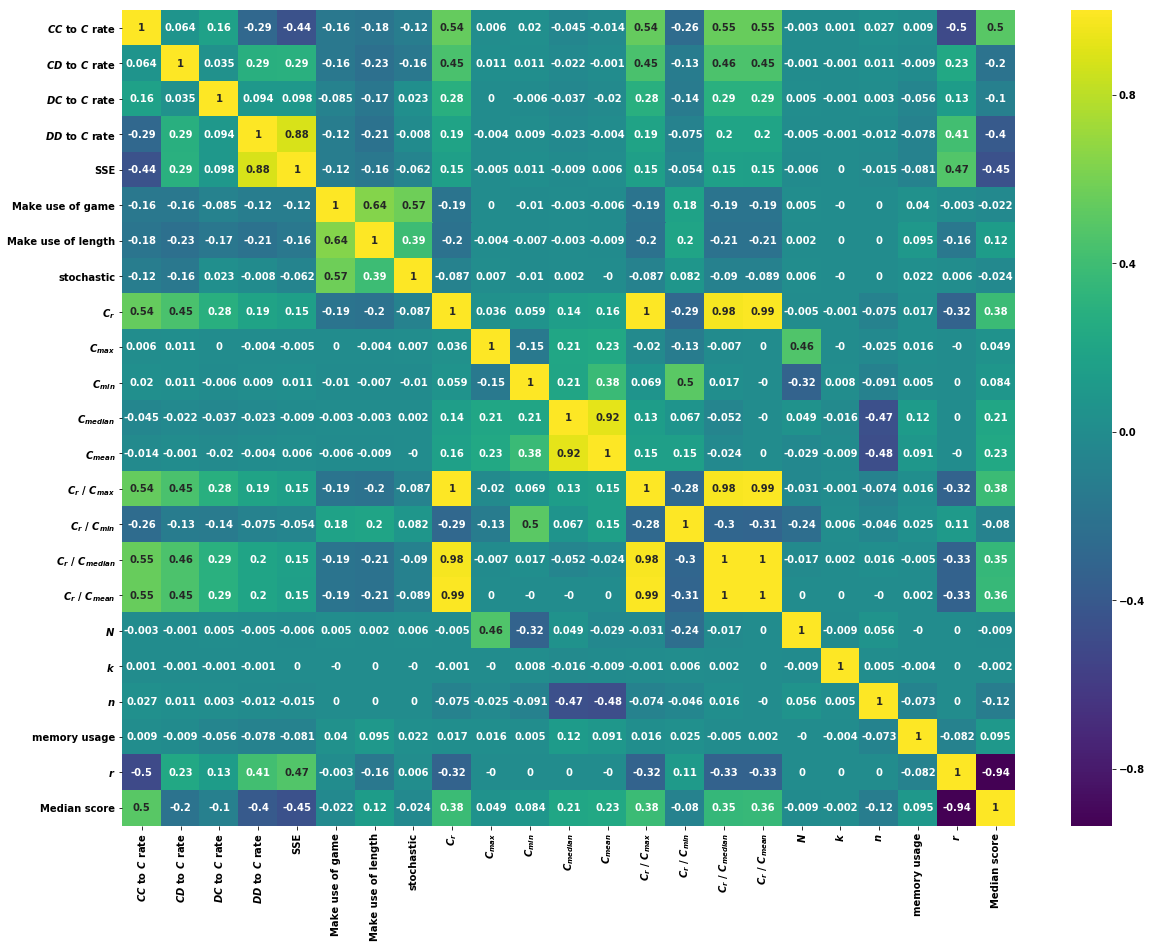

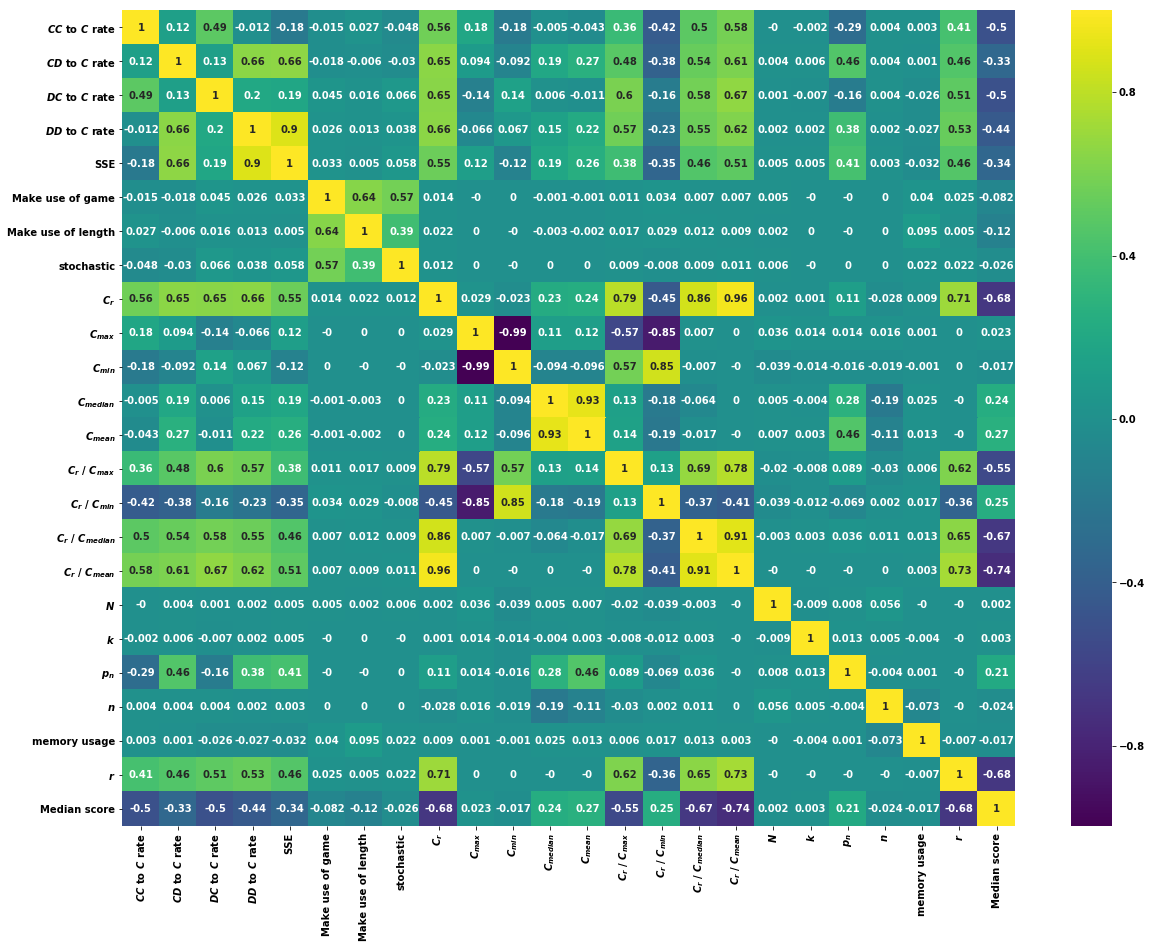

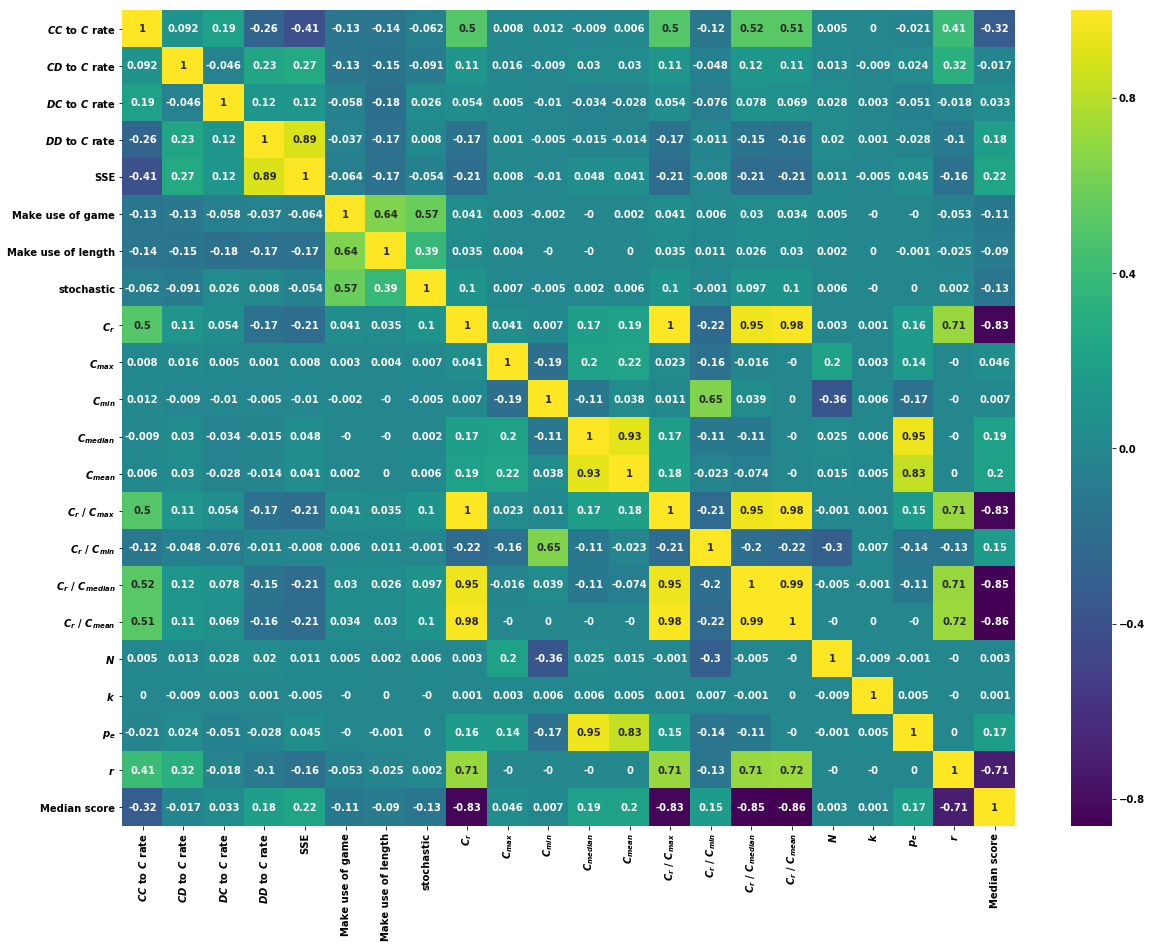

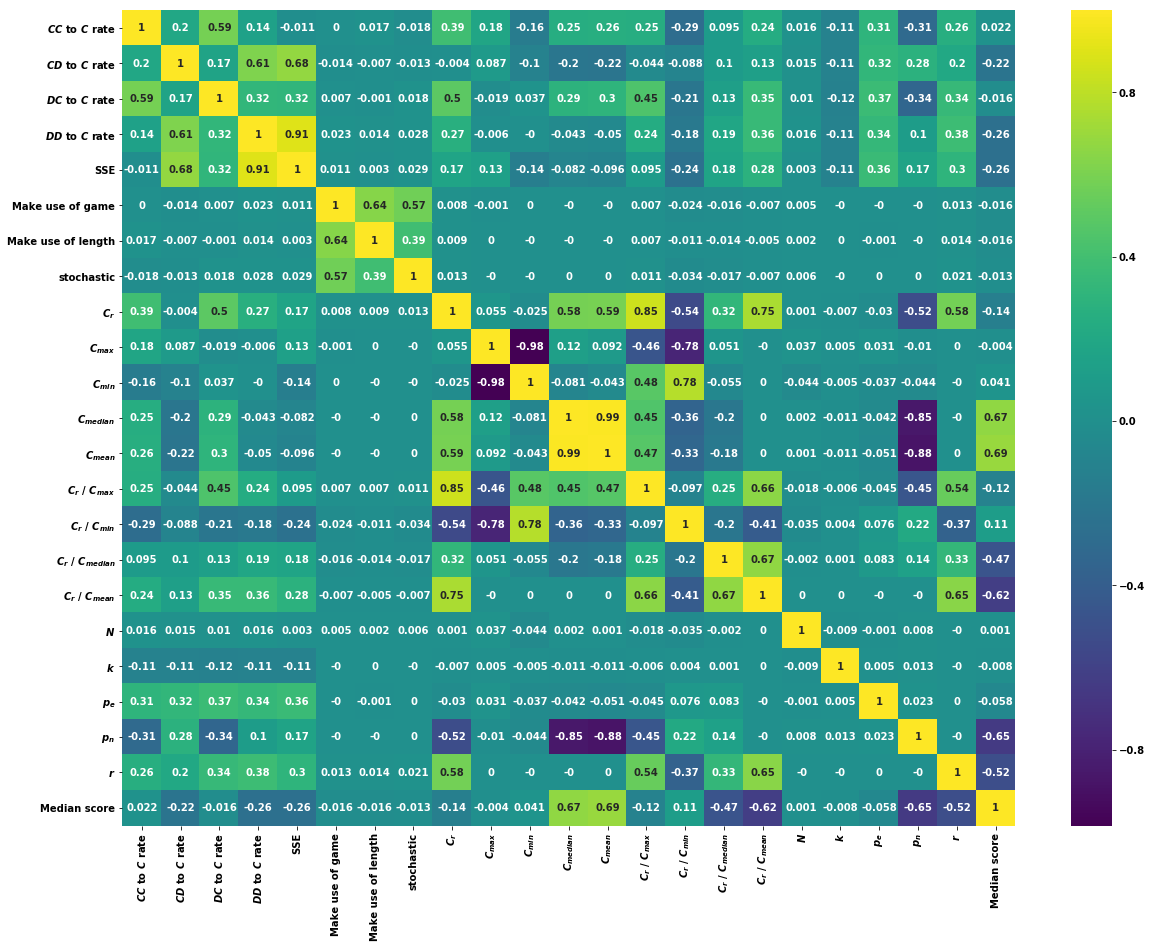

In [6]:
for file in ['standard', 'noise', 'probend', 'probend_noise']:
    df = pd.read_csv('../data/%s_3_processed.csv' % file)
    
    features = [
        "CC_to_C_rate",
        "CD_to_C_rate",
        "DC_to_C_rate",
        "DD_to_C_rate",
        "SSE",
        "Makes_use_of_game",
        "Makes_use_of_length",
        "Stochastic",
        "Cooperation_rating",
        "Cooperation_rating_max",
        "Cooperation_rating_min",
        "Cooperation_rating_median",
        "Cooperation_rating_mean",
        "Cooperation_rating_comp_to_max",
        "Cooperation_rating_comp_to_min",
        "Cooperation_rating_comp_to_median",
        "Cooperation_rating_comp_to_mean",
        "size",
        "repetitions"
    ]
    
    if file == "standard":
        features += ["turns", "memory_usage"]
    if file == "noise":
        features += ["noise", "turns", "memory_usage"]
    if file == "probend":
        features += ["probend"]
    if file == "probend_noise":
        features += ["probend", "noise"]
    
    corr_data = df[features + clustering_on]
    corrmat = corr_data.corr()
    top_corr_features = corrmat.index
    
    data = corr_data[top_corr_features].corr().round(3)
    data.columns = [plot.features_labels[feature] for feature in data.columns]
    data.index = [plot.features_labels[feature] for feature in corr_data.corr().index]
    
    plt.figure(figsize=(20, 15))

    sns.heatmap(data,
                annot=True,
                cmap="viridis",);

    plt.savefig(
        "../images/%s_correlation_plot.pdf" % file, bbox_inches="tight"
    )

In [11]:
tables = []
for file in ['standard', 'noise', 'probend', 'probend_noise']:
    df = pd.read_csv('../data/%s_3_processed.csv' % file)
    
    features = [
        "CC_to_C_rate",
        "CD_to_C_rate",
        "DC_to_C_rate",
        "DD_to_C_rate",
        "SSE",
        "Makes_use_of_game",
        "Makes_use_of_length",
        "Stochastic",
        "Cooperation_rating",
        "Cooperation_rating_max",
        "Cooperation_rating_min",
        "Cooperation_rating_median",
        "Cooperation_rating_mean",
        "Cooperation_rating_comp_to_max",
        "Cooperation_rating_comp_to_min",
        "Cooperation_rating_comp_to_median",
        "Cooperation_rating_comp_to_mean",
        "size",
        "repetitions"
    ]
    if file == "standard":
        features += ["turns", "memory_usage"]
    if file == "noise":
        features += ["noise", "turns", "memory_usage"]
    if file == "probend":
        features += ["probend"]
    if file == "probend_noise":
        features += ["probend", "noise"]
    
    corr_data = df[features + clustering_on].corr()
    table = corr_data[clustering_on].iloc[:-2].round(3)
    table.index = [plot.features_labels[index] for index in table.index]
    tables.append(table)

In [12]:
textfile = open('../paper/correlation_table_four_types.tex', 'w')
textfile.write(pd.concat(tables, axis=1).to_latex().replace('\$', '$').replace('\_', '_').replace('\{', '{').replace('\}', '}'))
textfile.close()

//anaconda3/envs/axlml/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
